# Predicting Car Insurance Premium

## Introduction

In [45]:
# The objective of this project is to leverage data-driven approaches and predictive modeling techniques 
# to develop a robust framework for estimating car insurance costs. 
# By analyzing historical data and identifying patterns within various attributes, 
# I aim to build a predictive model that accurately forecasts insurance premiums based on individual characteristics. 
# This predictive model will enable insurance companies to streamline their underwriting processes, 
# optimize pricing strategies, and offer competitive premiums tailored to each customer's risk profile.

## Data Sources

In [46]:
# Car Insurance: https://www.bankrate.com/insurance/car/auto-insurance-statistics/#auto-insurance-costs-by-state
# State Data: https://www.kff.org/state-category/demographics-and-the-economy/

## Get Car Insurance Data

In [1]:
# Import some necessary libraries/packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Import warnings and set filter warnings to ignore due to the use of deprecated code  
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read csv file using pandas
car = pd.read_csv('C:\\Users\\Owner\\CarInsuranceCost.csv')

# Displaying the first few rows of the DataFrame to inspect the data
car.head()

,Age,AnnualPremium,State,DrivingIncident,Gender
0,16,5203.0,Alabama,Clean,M
1,18,8127.0,Alabama,Clean,M
2,20,5691.0,Alabama,Clean,M
3,25,2807.0,Alabama,Clean,M
4,30,2356.0,Alabama,Clean,M


## Get State Data

In [3]:
# Read csv file using pandas
statedata = pd.read_csv('C:\\Users\\Owner\\statedata.csv')

# Displaying the first few rows of the DataFrame to inspect the data
statedata.head()

,Population,Income,Illiteracy,LifeExp,Murder,HSGrad,Frost,Area,stateabb,statearea,x,y,statedivision,statename,stateregion
0,3615,3624,2.1,69.05,15.1,41.3,20,50708,AL,51609,-86.7509,32.5901,East South Central,Alabama,South
1,365,6315,1.5,69.31,11.3,66.7,152,566432,AK,589757,-127.2500,49.2500,Pacific,Alaska,West
2,2212,4530,1.8,70.55,7.8,58.1,15,113417,AZ,113909,-111.6250,34.2192,Mountain,Arizona,West
3,2110,3378,1.9,70.66,10.1,39.9,65,51945,AR,53104,-92.2992,34.7336,West South Central,Arkansas,South
4,21198,5114,1.1,71.71,10.3,62.6,20,156361,CA,158693,-119.7730,36.5341,Pacific,California,West


In [4]:
# Renaming the column 'statename' to 'State' in the statedata DataFrame
statedata.rename({'statename':'State'},axis=1,inplace=True)

In [5]:
# Displaying the first few rows of the statedata DataFrame after renaming the column
statedata.head()

,Population,Income,Illiteracy,LifeExp,Murder,HSGrad,Frost,Area,stateabb,statearea,x,y,statedivision,State,stateregion
0,3615,3624,2.1,69.05,15.1,41.3,20,50708,AL,51609,-86.7509,32.5901,East South Central,Alabama,South
1,365,6315,1.5,69.31,11.3,66.7,152,566432,AK,589757,-127.2500,49.2500,Pacific,Alaska,West
2,2212,4530,1.8,70.55,7.8,58.1,15,113417,AZ,113909,-111.6250,34.2192,Mountain,Arizona,West
3,2110,3378,1.9,70.66,10.1,39.9,65,51945,AR,53104,-92.2992,34.7336,West South Central,Arkansas,South
4,21198,5114,1.1,71.71,10.3,62.6,20,156361,CA,158693,-119.7730,36.5341,Pacific,California,West


## Join Car and Statedata to get the final dataset

In [6]:
# Perform inner join
df = pd.merge(car, statedata, on='State', how='inner')

In [7]:
# Display a few records
df.head()

,Age,AnnualPremium,State,DrivingIncident,Gender,Population,Income,Illiteracy,LifeExp,Murder,HSGrad,Frost,Area,stateabb,statearea,x,y,statedivision,stateregion
0,16,5203.0,Alabama,Clean,M,3615,3624,2.1,69.05,15.1,41.3,20,50708,AL,51609,-86.7509,32.5901,East South Central,South
1,18,8127.0,Alabama,Clean,M,3615,3624,2.1,69.05,15.1,41.3,20,50708,AL,51609,-86.7509,32.5901,East South Central,South
2,20,5691.0,Alabama,Clean,M,3615,3624,2.1,69.05,15.1,41.3,20,50708,AL,51609,-86.7509,32.5901,East South Central,South
3,25,2807.0,Alabama,Clean,M,3615,3624,2.1,69.05,15.1,41.3,20,50708,AL,51609,-86.7509,32.5901,East South Central,South
4,30,2356.0,Alabama,Clean,M,3615,3624,2.1,69.05,15.1,41.3,20,50708,AL,51609,-86.7509,32.5901,East South Central,South


## Data Preprocessing

## Drop features that are not useful

In [8]:
# Display the column labels of the DataFrame (df)
df.columns

Index(['Age', 'AnnualPremium', 'State', 'DrivingIncident', 'Gender',
       'Population', 'Income', 'Illiteracy', 'LifeExp', 'Murder', 'HSGrad',
       'Frost', 'Area', 'stateabb', 'statearea', 'x', 'y', 'statedivision',
       'stateregion'],
      dtype='object')

In [9]:
# Dropping specified columns from the DataFrame 'df'
df.drop(['Population', 'Illiteracy', 'Murder','HSGrad', 'Frost','LifeExp','State',
       'Area', 'stateabb', 'statearea', 'x', 'y', 'statedivision'],axis=1, inplace=True)

In [10]:
# Display a few records
df.head()

,Age,AnnualPremium,DrivingIncident,Gender,Income,stateregion
0,16,5203.0,Clean,M,3624,South
1,18,8127.0,Clean,M,3624,South
2,20,5691.0,Clean,M,3624,South
3,25,2807.0,Clean,M,3624,South
4,30,2356.0,Clean,M,3624,South


## Find shape 

In [11]:
# Retrieve the shape of the DataFrame
df.shape

(3168, 6)

## Get dataset information

In [12]:
# Display concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3168 entries, 0 to 3167
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              3168 non-null   int64  
 1   AnnualPremium    3168 non-null   float64
 2   DrivingIncident  3168 non-null   object 
 3   Gender           3168 non-null   object 
 4   Income           3168 non-null   int64  
 5   stateregion      3168 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 173.2+ KB


## Check missing values

In [13]:
# Calculate the sum of missing values in each column of the DataFrame
df.isnull().sum()

Age                0
AnnualPremium      0
DrivingIncident    0
Gender             0
Income             0
stateregion        0
dtype: int64

In [16]:
# There is no missing values in the dataset.

## Check duplicates

In [14]:
# Check duplicates
df.duplicated().sum()

0

In [18]:
# There is no duplicates

## Stats Summary

In [15]:
# Generate descriptive statistics for numerical columns in the DataFrame
df.describe()

,Age,AnnualPremium,Income
count,3168.000000,3168.000000,3168.000000
mean,36.555556,3766.212053,4457.886364
std,18.496829,2506.579778,602.796912
min,16.000000,118.000000,3378.000000
25%,20.000000,2044.432500,3993.250000
50%,30.000000,2937.350000,4519.000000
75%,50.000000,4711.935000,4827.250000
max,70.000000,20558.100000,6315.000000


In [20]:
# Annual Premium: right skewed due to mean > median
# Income: left skewed due to mean < median

## Data Analysis

In [16]:
# Display the column labels of the DataFrame (df)
df.columns

Index(['Age', 'AnnualPremium', 'DrivingIncident', 'Gender', 'Income',
       'stateregion'],
      dtype='object')

In [47]:
# Display a few records
df.head()

,Age,AnnualPremium,DrivingIncident,Gender,Income,stateregion
0,16,5203.0,1,1,3624,2
1,18,8127.0,1,1,3624,2
2,20,5691.0,1,1,3624,2
3,25,2807.0,1,1,3624,2
4,30,2356.0,1,1,3624,2


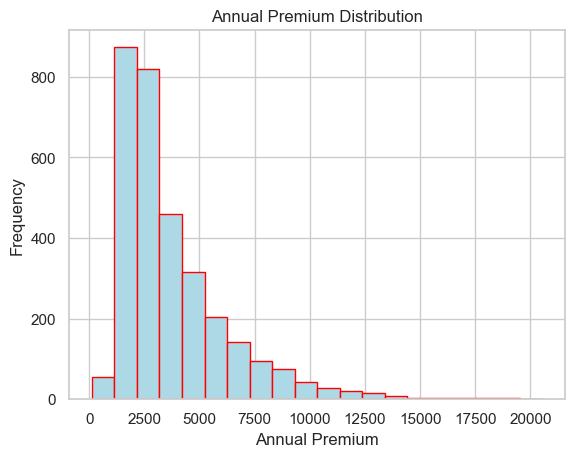

In [50]:
# Import the pyplot module from the matplotlib library
import matplotlib.pyplot as plt

# Set blue color
colors = ['lightblue']

# Creates a histogram using the plt.hist() function
plt.hist(x=df["AnnualPremium"], bins=20, color=colors, edgecolor='red' )

# These lines set the title of the plot to "AnnualPremium Distribution" using plt.title(), the label for 
# the x-axis to "AnnualPremium" using plt.xlabel(), and the label for the y-axis to "Frequency" using plt.ylabel().
plt.title("Annual Premium Distribution")
plt.xlabel("Annual Premium")
plt.ylabel("Frequency")

# Display the plot
plt.show()

In [19]:
# Counting the occurrences of each unique value in the 'stateregion' column
df['stateregion'].value_counts()

South            1008
West              864
North Central     720
Northeast         576
Name: stateregion, dtype: int64

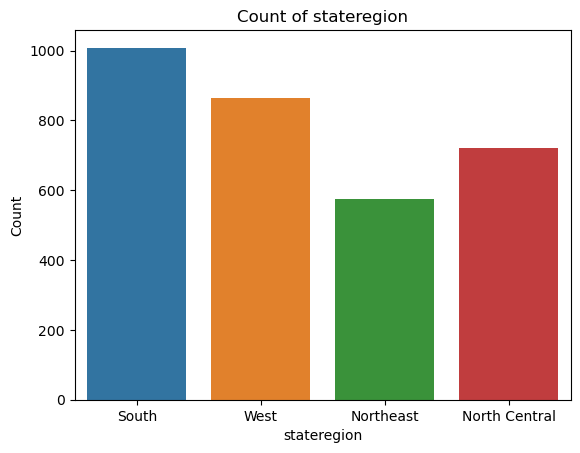

In [20]:
# stateregion

# Creating a count plot to visualize the distribution of 'stateregion' values
sns.countplot(x='stateregion', data=df)

# Adding title and labels to the plot
plt.title('Count of stateregion')
plt.xlabel('stateregion')
plt.ylabel('Count')

# Displaying the plot
plt.show()

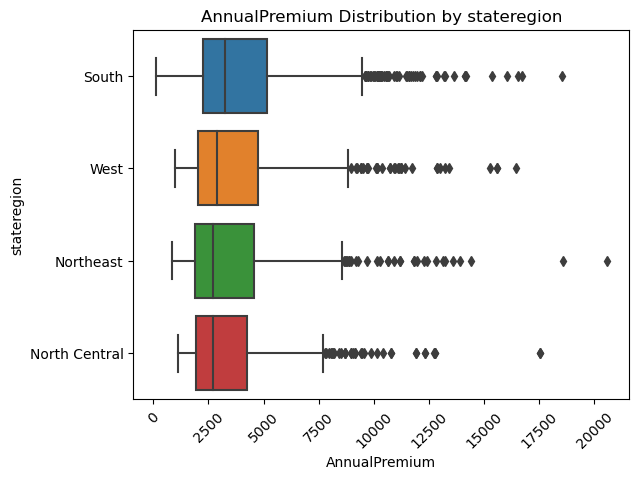

In [21]:
# Creates a box plot using seaborn's boxplot function
sns.boxplot(y='stateregion', x='AnnualPremium', data=df)

# These lines set the title of the plot to "AnnualPremium Distribution by stateregion" using plt.title(), 
# the label for the x-axis to "AnnualPremium" using plt.xlabel(), and the label for the y-axis to 
# "stateregion" using plt.ylabel()
plt.title('AnnualPremium Distribution by stateregion')
plt.xlabel('AnnualPremium')
plt.ylabel('stateregion')

# This line rotates the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Display the plot
plt.show()

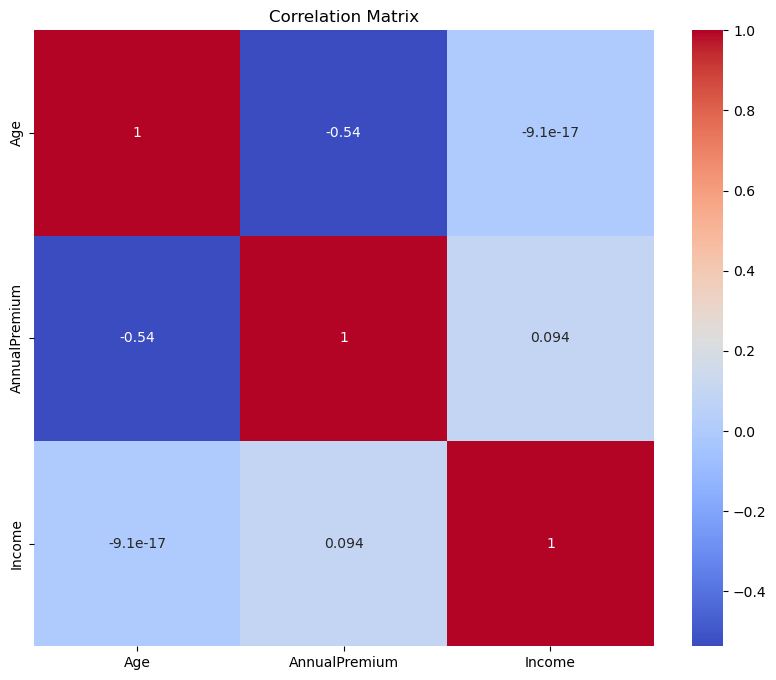

In [22]:
# Heatmap or Correlation Matrix

# Setting the figure size for the heatmap
plt.figure(figsize=(10, 8))

# Creating a heatmap to visualize the correlation matrix of the DataFrame 'df'
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

# Setting the title for the heatmap
plt.title('Correlation Matrix')

# Displaying the heatmap
plt.show()

In [23]:
# Display a few records
df.head()

,Age,AnnualPremium,DrivingIncident,Gender,Income,stateregion
0,16,5203.0,Clean,M,3624,South
1,18,8127.0,Clean,M,3624,South
2,20,5691.0,Clean,M,3624,South
3,25,2807.0,Clean,M,3624,South
4,30,2356.0,Clean,M,3624,South


## Label encoding

In [24]:
# Selecting columns with data type 'object' (categorical columns)
category_cols = df.select_dtypes(include=['object']).columns

# Displaying the resulting categorical columns
category_cols

Index(['DrivingIncident', 'Gender', 'stateregion'], dtype='object')

In [25]:
# Import the LabelEncoder class from the preprocessing module of scikit-learn
from sklearn.preprocessing import LabelEncoder

# This line creates an instance of the LabelEncoder class, which will be used to perform the encoding.
en=LabelEncoder()

# This loop iterates over each column name in the list category_cols, which contains the names of categorical
# columns in the DataFrame df. 
for i in category_cols:
    # This method fits the encoder to the unique values in the column (fitting) and 
    # then transforms the values in the column into numeric labels (transforming).
    df[i]=en.fit_transform(df[i])

In [26]:
# Display a few records
df.head()

,Age,AnnualPremium,DrivingIncident,Gender,Income,stateregion
0,16,5203.0,1,1,3624,2
1,18,8127.0,1,1,3624,2
2,20,5691.0,1,1,3624,2
3,25,2807.0,1,1,3624,2
4,30,2356.0,1,1,3624,2


## Store Feature Matrix In X and Response in Vector y

In [27]:
# Creating features (X) by dropping the 'AnnualPremium' column
X = df.drop('AnnualPremium', axis=1)

# Creating target variable (y) with the 'AnnualPremium' column
y = df['AnnualPremium']

## Splitting Data Into The Training and Test Sets

In [28]:
# Splitting the data into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

## Normalization

In [29]:
# Creating a StandardScaler object
sc = StandardScaler()

In [30]:
# Scaling the features in the training set
X_train = sc.fit_transform(X_train)

# Scaling the features in the testing set
X_test = sc.transform(X_test)

In [31]:
# Show the result of X_train
X_train

array([[ 0.74204636,  1.35365831,  1.01111145, -0.55613342,  1.2359407 ],
       [-0.89617064,  1.35365831, -0.98901066, -1.36172276,  0.33701024],
       [-1.11459958,  1.35365831,  1.01111145, -0.47624026, -1.46085069],
       ...,
       [ 0.19597403,  1.35365831, -0.98901066, -1.23356082,  0.33701024],
       [ 1.2881187 ,  0.46247355, -0.98901066, -1.26352075, -0.56192023],
       [ 0.19597403,  0.46247355, -0.98901066, -0.55613342,  1.2359407 ]])

In [32]:
# Show the result of X_test
X_test

array([[ 0.74204636, -1.31989598, -0.98901066, -0.96225697,  0.33701024],
       [ 1.83419103, -0.42871122, -0.98901066, -1.23356082,  0.33701024],
       [ 1.83419103, -1.31989598,  1.01111145,  0.12795175,  1.2359407 ],
       ...,
       [-0.89617064,  0.46247355,  1.01111145,  0.59233073,  0.33701024],
       [-0.89617064,  0.46247355, -0.98901066, -0.55613342,  1.2359407 ],
       [-0.89617064, -0.42871122,  1.01111145, -1.05213677,  0.33701024]])

## Import The models

In [33]:
# Import some necessary libraries/packages
from sklearn.linear_model import LinearRegression
from  sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Training & Evaluation

In [34]:
# create an instance of the LinearRegression 
lr = LinearRegression()

# train the LinearRegression model (lr) on the training data 
lr.fit(X_train,y_train)

# use the trained LinearRegression model (lr) to predict the test data 
y_pred_lr= lr.predict(X_test)

# Print the results
print('R2 Score of lr:', metrics.r2_score(y_test,y_pred_lr))
print('MAE Score of lr:', metrics.mean_absolute_error(y_test, y_pred_lr))

R2 Score of lr: 0.32896647988900785
MAE Score of lr: 1416.7370685155968


In [35]:
# Repeat the same for SVM

# Creating an SVR model
svm = SVR()

# Fitting the SVR model on the training data
svm.fit(X_train, y_train)

# Predicting the target variable for the test data
y_pred_svm = svm.predict(X_test)

# Calculating and printing the R2 score
print('R2 Score of svm:', metrics.r2_score(y_test, y_pred_svm))

# Calculating and printing the mean absolute error
print('MAE Score of svm:', metrics.mean_absolute_error(y_test, y_pred_svm))

R2 Score of svm: -0.08906876134073083
MAE Score of svm: 1679.5201318261393


In [36]:
# Repeat the same for RF

# Creating a RandomForestRegressor model
rf = RandomForestRegressor()

# Fitting the RandomForestRegressor model on the training data
rf.fit(X_train, y_train)

# Predicting the target variable for the test data
y_pred_rf = rf.predict(X_test)

# Calculating and printing the R2 score
print('R2 Score of rf:', metrics.r2_score(y_test, y_pred_rf))

# Calculating and printing the mean absolute error
print('MAE Score of rf:', metrics.mean_absolute_error(y_test, y_pred_rf))

R2 Score of rf: 0.8916111315909813
MAE Score of rf: 465.6122768359622


In [37]:
# Repeat the same for GBC

# Creating a GradientBoostingRegressor model
gr = GradientBoostingRegressor()

# Fitting the GradientBoostingRegressor model on the training data
gr.fit(X_train, y_train)

# Predicting the target variable for the test data
y_pred_gr = gr.predict(X_test)

# Calculating and printing the R2 score
print('R2 Score of gr:', metrics.r2_score(y_test, y_pred_gr))

# Calculating and printing the mean absolute error
print('MAE Score of gr:', metrics.mean_absolute_error(y_test, y_pred_gr))

R2 Score of gr: 0.8782709175499571
MAE Score of gr: 519.8352733322461


In [38]:
# Repeat the same for XGB

# Creating an XGBRegressor model
xgb = XGBRegressor()

# Fitting the XGBRegressor model on the training data
xgb.fit(X_train, y_train)

# Predicting the target variable for the test data
y_pred_xgb = xgb.predict(X_test)

# Calculating and printing the R2 score
print('R2 Score of xgb:', metrics.r2_score(y_test, y_pred_xgb))

# Calculating and printing the mean absolute error
print('MAE Score of xgb:', metrics.mean_absolute_error(y_test, y_pred_xgb))

R2 Score of xgb: 0.979119813776361
MAE Score of xgb: 192.9757674830873


In [39]:
# Creating a DataFrame to store R2 scores for different models
df_R2 = pd.DataFrame({'Models':['LR','SVC','RF','GBC','XGB'],
                           'R2_SCORE':[metrics.r2_score(y_test,y_pred_lr),
                                       metrics.r2_score(y_test,y_pred_svm),
                                       metrics.r2_score(y_test,y_pred_rf),
                                       metrics.r2_score(y_test,y_pred_gr),
                                       metrics.r2_score(y_test,y_pred_xgb)]})

In [40]:
# Displaying the DataFrame containing R2 scores for different models
df_R2

,Models,R2_SCORE
0,LR,0.328966
1,SVC,-0.089069
2,RF,0.891611
3,GBC,0.878271
4,XGB,0.979120


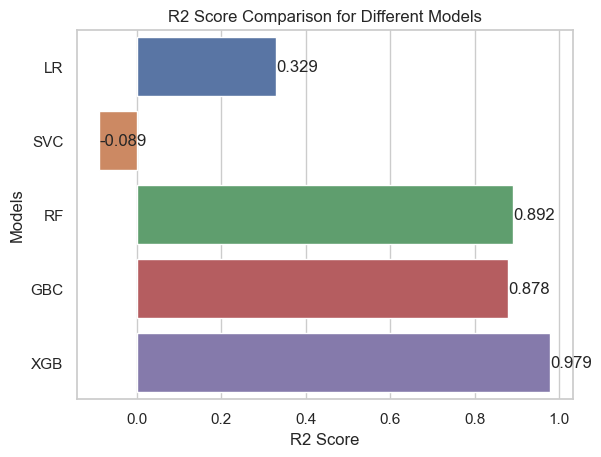

In [41]:
# Set the style of the plot
sns.set(style="whitegrid")

# Create the bar plot
ax = sns.barplot(x='R2_SCORE', y='Models', data=df_R2)

# Adding labels and title
plt.xlabel('R2 Score')
plt.ylabel('Models')
plt.title('R2 Score Comparison for Different Models')

# Add text labels for each bar
for index, row in df_R2.iterrows():
    ax.text(row['R2_SCORE'], index, f'{row["R2_SCORE"]:.3f}', va='center')

# Display the plot
plt.show()

In [42]:
# Creating a DataFrame to store MAE scores for different models
df_MAE = pd.DataFrame({'Models':['LR','SVC','RF','GBC','XGB'],
                           'MAE_SCORE':[metrics.mean_absolute_error(y_test,y_pred_lr),
                                       metrics.mean_absolute_error(y_test,y_pred_svm),
                                       metrics.mean_absolute_error(y_test,y_pred_rf),
                                       metrics.mean_absolute_error(y_test,y_pred_gr),
                                       metrics.mean_absolute_error(y_test,y_pred_xgb)]})

In [43]:
# Displaying the DataFrame containing MAE scores for different models
df_MAE

,Models,MAE_SCORE
0,LR,1416.737069
1,SVC,1679.520132
2,RF,465.612277
3,GBC,519.835273
4,XGB,192.975767


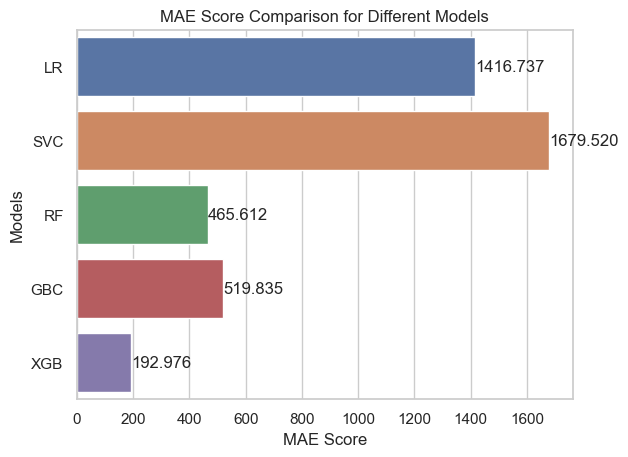

In [44]:
# Set the style of the plot
sns.set(style="whitegrid")

# Create the bar plot
ax = sns.barplot(x='MAE_SCORE', y='Models', data=df_MAE)

# Adding labels and title
plt.xlabel('MAE Score')
plt.ylabel('Models')
plt.title('MAE Score Comparison for Different Models')

# Add text labels for each bar
for index, row in df_MAE.iterrows():
    ax.text(row['MAE_SCORE'], index, f'{row["MAE_SCORE"]:.3f}', va='center')

# Display the plot
plt.show()

In [51]:
# XGB Boosting model the best model for it has the highest R2 score, 97.9%, and lowest MAE score, 192.98.